In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
import numpy as np; import pandas as pd
import matplotlib; import matplotlib.pyplot as plt
!pip freeze > '../working/requirements.txt'
img_dir='../input/jurkat cells (merged only)/jurkat cells (merged only)/'

In [2]:
path=Path(img_dir)
data=ImageDataBunch.from_folder(path, train=".",valid_pct=0.3,ds_tfms=get_transforms(do_flip=True,flip_vert=True,max_rotate=90,max_lighting=0.3),size=224,bs=64,num_workers=0).normalize(imagenet_stats)
learn=create_cnn(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/")
learn.fit_one_cycle(10)
interp=ClassificationInterpretation.from_learner(learn)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 90561466.35it/s]


epoch,train_loss,valid_loss,accuracy
1,0.261273,0.116828,0.977064
2,0.116299,0.099475,0.977580
3,0.100875,0.092744,0.977890
4,0.086267,0.081839,0.979027
5,0.087521,0.077671,0.979853


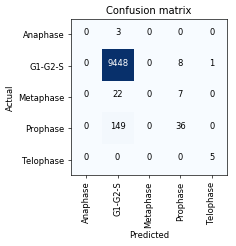

In [3]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)